<div style="text-align:center">
    <h1>
        Policy Iteration
    </h1>
</div>
<br>

<div style="text-align:center">
    <p>
        In this notebook we are going to look at a dynamic programming algorithm called policy iteration. In it, we will iteratively interleave two processes: policy evaluation and policy improvement, until the optimal policy and state values are found.
    </p>
</div>

<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 3 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [83]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

## Initialize the environment

In [84]:
env = Maze()

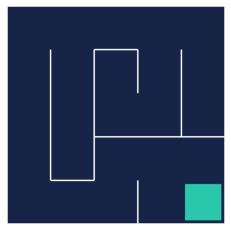

In [85]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [86]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

# nvec -> numero de filas y columntas
# n -> numero de acciones disponibles para el agente

Observation space shape: [5 5]
Number of actions: 4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

In [87]:
# las filas son 4 (up, down,...)  5 tablas de 5x4 con 0.25
policy_probs = np.full((5, 5, 4), 0.25)

In [88]:
# toma un estado y devuelve cada una de las % que tiene disponibles
def policy(state):
    return policy_probs[state]

#### Test the policy with state (0, 0)

In [46]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


#### See how the random policy does in the maze

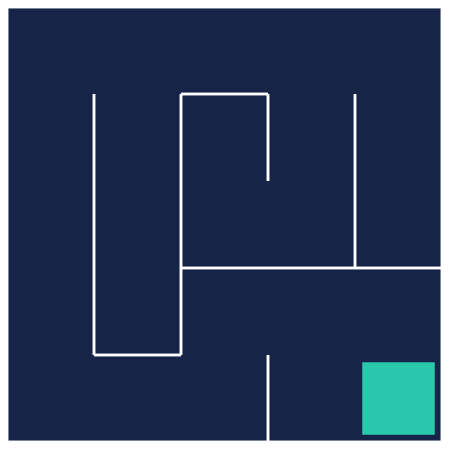

In [81]:
test_agent(env, policy, episodes=1)

#### Plot the policy

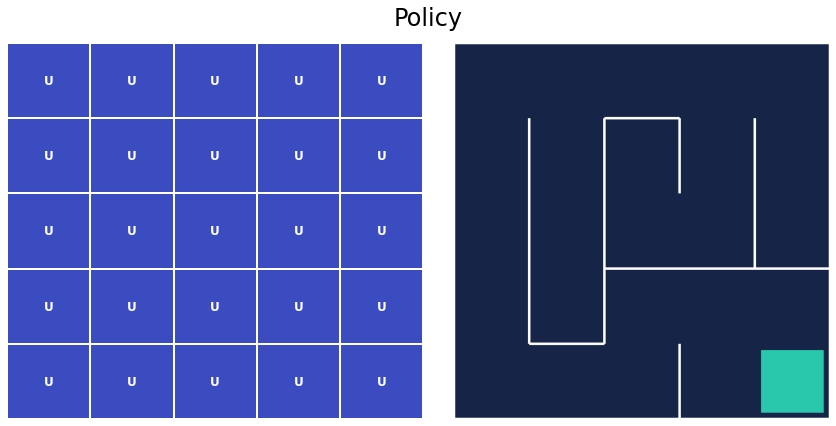

In [48]:
plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [89]:
state_values = np.zeros(shape=(5,5))

#### Plot $V(s)$

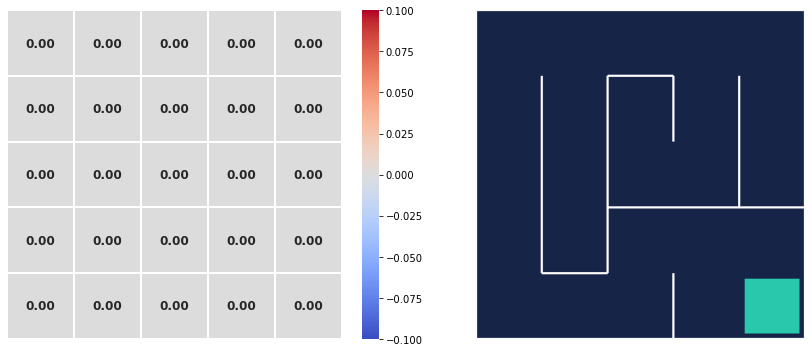

In [65]:
plot_values(state_values, frame)

## Implement the Policy Iteration algorithm

</br>

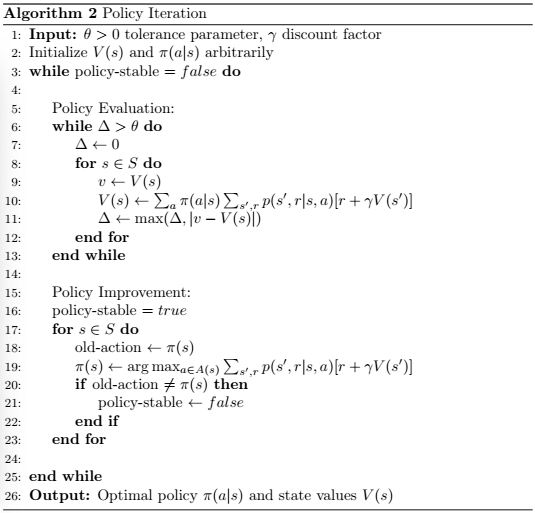

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [90]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float("inf") # los valores van a ir cada vez siendo mas pequeños, hasta llegar a los optimos
    
    while delta > theta:
        delta = 0
        
        for row in range(5):
            for col in range(5):
                # cada combinacion de fila y columna representa un estado
                old_value = state_values[(row, col)]
                action_probs = None # % para tomar cada accion
                max_qsa = float("-inf") # mayor valor de todas las acciones disponibles
                
                for action in range(4):
                    # cada una de las acciones disponibles
                    
                    # simular que pasaria al ejecutar una accion en cada estado
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    qsa = reward + gamma * state_values[next_state] # valor de la accion
                    
                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1. # %100 al tomar esta acion
                    
                    
                state_values[(row, col)] = max_qsa # asignamos el valor de la accion optima
                policy_probs[(row, col)] = action_probs # %100 de escojer la opcion optima
                print(delta)
                delta = max(delta, abs(max_qsa - old_value)) # delta o (max_qsa - old), el maximo
        
                
                

In [91]:
value_iteration(policy_probs, state_values)

0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0.9801
0
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0.9702989999999998
0
0.9605960100000002
0.9605960100000002
0.9605960100000002
0.9605960100000002
0.9605960100000002
0.9605960100000002
0.9605960100000002
0.960596010000000

## Show results

#### Test the resulting agent

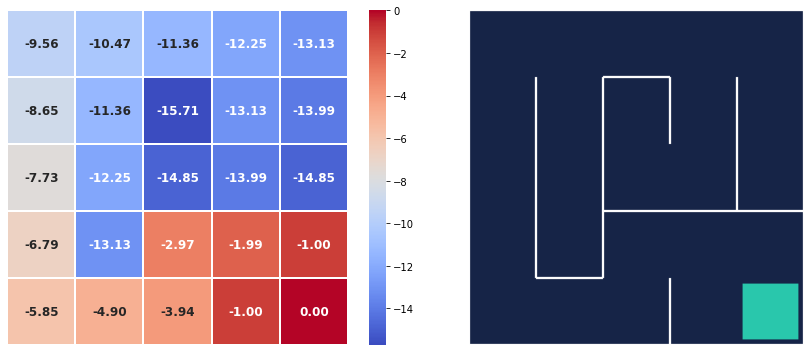

In [70]:
plot_values(state_values, frame)

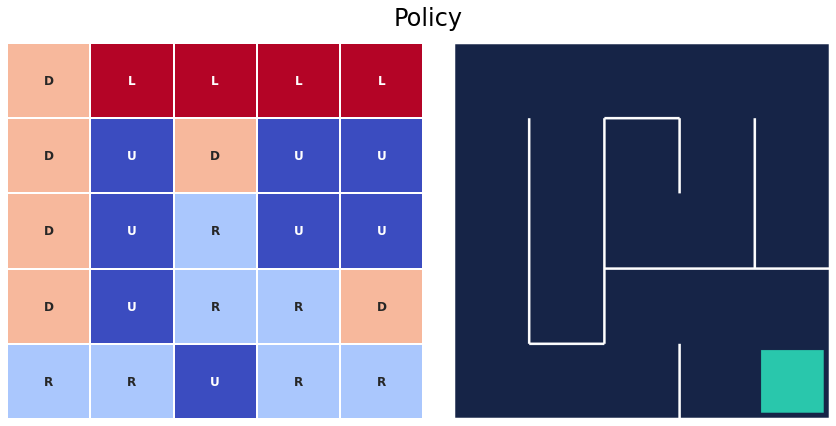

In [72]:
plot_policy(policy_probs, frame)

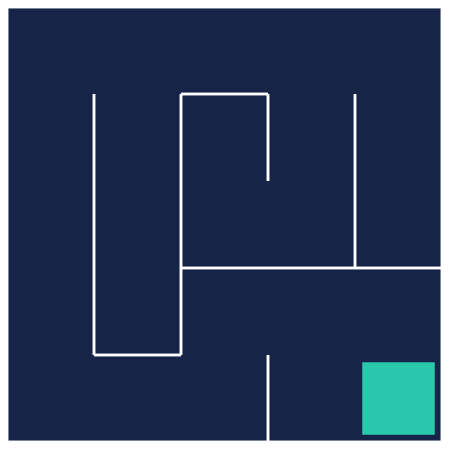

In [92]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)